# 서울시 구별 CCTV 현황 분석

In [2]:
import pandas as pd
import numpy as np

### 1. CCTV_in_Seoul 불러오기

In [3]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
# dataframe index name
CCTV_Seoul.columns
CCTV_Seoul.columns[0] # indexing

'기관명'

In [5]:
# CCTV_Seoul의 index내용 변경 : '기관명' -> '구별'
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### 2. population_in_Seoul 불러오기

In [6]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.1/4,합계,4290922,10054979,4909387,5145592,9770216,4772134,4998082,284763,137253,147510,2.28,1436125
3,2019.1/4,종로구,73914,162913,78963,83950,152778,74536,78242,10135,4427,5708,2.07,26981
4,2019.1/4,중구,61800,135836,66720,69116,125942,61992,63950,9894,4728,5166,2.04,22421


### 3. 인구데이터 편집

In [7]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', 
                          header=2, # 세번째 줄부터 읽기
                          parse_cols='B, D, G, J, N', # 출력할 columns 선택
                          encoding='utf-8')
pop_Seoul.head()

C:\Users\leebj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


In [8]:
# column 이름 변경
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                         pop_Seoul.columns[1] : '인구수',
                         pop_Seoul.columns[2] : '한국인',
                         pop_Seoul.columns[3] : '외국인',
                         pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


### 4. CCTV 데이터 파악

In [9]:
# '소계'를 기준으로 오름차순 정렬
CCTV_Seoul.sort_values(by='소계', ascending=True).head()
# '소계'를 기준으로 내림차순 정렬
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [10]:
# CCTV 최근증가율 column 생성
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                      CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


### 5. 인구 데이터 파악

In [11]:
# 1행 제거
# pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


In [12]:
# 한 번 이상 나타낸 데이터 파악
pop_Seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [13]:
# pop_Seoul의 '구별'column이 null값인 데이터 출력
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [14]:
# 외국인비율, 고령자비율 산정
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10054979,9770216,284763,1436125,2.832060,14.282725
1,종로구,162913,152778,10135,26981,6.221112,16.561600
2,중구,135836,125942,9894,22421,7.283783,16.505934
3,용산구,245139,229168,15971,38049,6.515079,15.521398
4,성동구,314608,306404,8204,43076,2.607690,13.691960


In [15]:
# '인구수'를 기준으로 정렬
pop_Seoul.sort_values(by='인구수', ascending=False).head()
# 송파구, 강서구, 강남구, 노원구, 관악구 순으로 인구수가 가장 많다.

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10054979,9770216,284763,1436125,2.832060,14.282725
24,송파구,685361,678521,6840,83492,0.998014,12.182193
16,강서구,602886,596287,6599,80903,1.094568,13.419287
23,강남구,546875,541854,5021,68104,0.918126,12.453303
11,노원구,545486,541174,4312,78170,0.790488,14.330340


In [16]:
# '외국인'인구를 기준으로 정렬
pop_Seoul.sort_values(by='외국인', ascending=False).head()
# 영등포구, 구로구, 금천구, 관악구, 동대문구 순으로 외국인 인구수가 높다.

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10054979,9770216,284763,1436125,2.832060,14.282725
19,영등포구,404556,368824,35732,56463,8.832399,13.956782
17,구로구,438889,404726,34163,63017,7.783973,14.358300
18,금천구,254244,233981,20263,36301,7.969903,14.278016
21,관악구,520645,502615,18030,73005,3.463012,14.022030


In [17]:
# '외국인비율'을 기준으로 정렬
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()
# 영등포구, 금천구, 구로구, 중구, 용산구 순으로 외국인비율이 높다.

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404556,368824,35732,56463,8.832399,13.956782
18,금천구,254244,233981,20263,36301,7.969903,14.278016
17,구로구,438889,404726,34163,63017,7.783973,14.358300
2,중구,135836,125942,9894,22421,7.283783,16.505934
3,용산구,245139,229168,15971,38049,6.515079,15.521398


In [18]:
# '고령자'인구를 기준으로 정렬
pop_Seoul.sort_values(by='고령자', ascending=False).head()
# 송파구, 강서구, 은평구, 노원구, 관악구 순으로 고령자인구가 많다.

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10054979,9770216,284763,1436125,2.832060,14.282725
24,송파구,685361,678521,6840,83492,0.998014,12.182193
16,강서구,602886,596287,6599,80903,1.094568,13.419287
12,은평구,488713,484274,4439,78406,0.908304,16.043363
11,노원구,545486,541174,4312,78170,0.790488,14.330340


In [19]:
# '고령자비율'을 기준으로 정렬
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()
# 강북구, 도봉구, 종로구, 중구, 은평구 순으로 고령자비율이 높다.

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,321151,317386,3765,58858,1.172346,18.327204
10,도봉구,340089,337820,2269,56742,0.667178,16.684456
1,종로구,162913,152778,10135,26981,6.221112,16.561600
2,중구,135836,125942,9894,22421,7.283783,16.505934
12,은평구,488713,484274,4439,78406,0.908304,16.043363


### 6. CCTV 데이터와 인구 현황 데이터를 합치고 분석

In [20]:
# merge로 데이터 병합
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,379,99,155,377,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,369,120,138,204,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,388,258,184,81,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,846,260,390,613,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [21]:
# 의미 없는 column 지우기
# 행 방향 삭제 : drop
# 열 방향 삭제 : delete
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [22]:
# set_index : 인덱스를 새로 설정해준다.
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [23]:
# correcoef : 상관계수 계산
# 0.1 이하 : 의미 없음
# 0.3 이하 : 약한 상관관계
# 0.7 이하 : 뚜렷한 상관관계
np.corrcoef(data_result['고령자비율'], data_result['소계']) # -0.28 : 약한 음의 상관관계 
np.corrcoef(data_result['외국인비율'], data_result['소계']) # -0.05 : 의미 없음
np.corrcoef(data_result['인구수'], data_result['소계']) # 0.21 : 약한 양의 상관관계

array([[1.        , 0.21773943],
       [0.21773943, 1.        ]])

In [24]:
data_result.sort_values(by='소계', ascending=False).head()
# CCTV가 많이 설치된 구 : 강남구, 양천구, 서초구, 관악구, 은평구...
data_result.sort_values(by='인구수', ascending=False).head()
# 인구수 내림차순 : 송파구, 강서구, 강남구, 노원구, 관악구

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,685361,678521,6840,83492,0.998014,12.182193
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
노원구,1566,188.929889,545486,541174,4312,78170,0.790488,14.330340
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


### 7. 시각화

In [26]:
# matplotlib 폰트 변경
import platform
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... Sorry!')

In [32]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


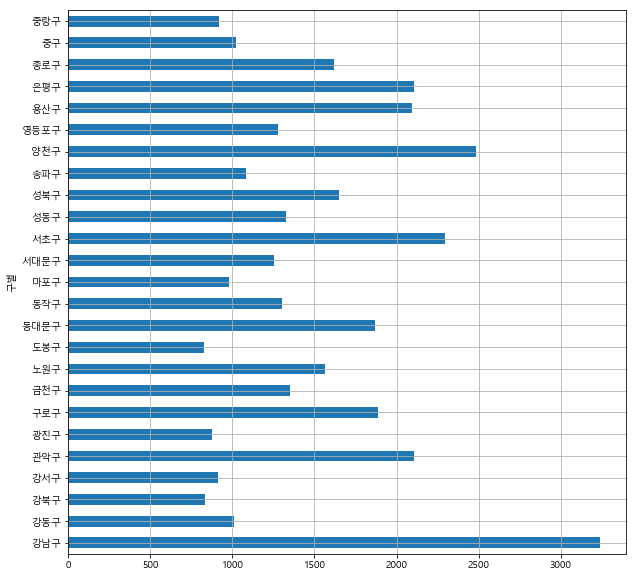

In [33]:
# 구별 CCTV개수 그래프
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
# kind='barh' : 수평바 그래프
# grid=True : 그리드 생성
plt.show()

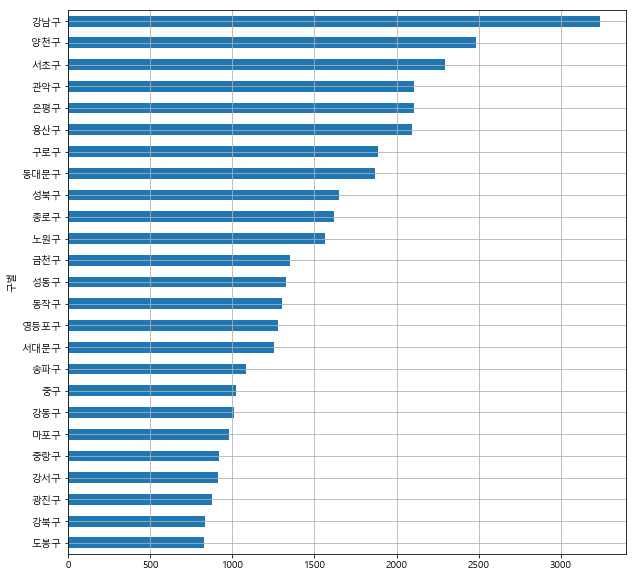

In [31]:
# 정렬된 데이터 그래프
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

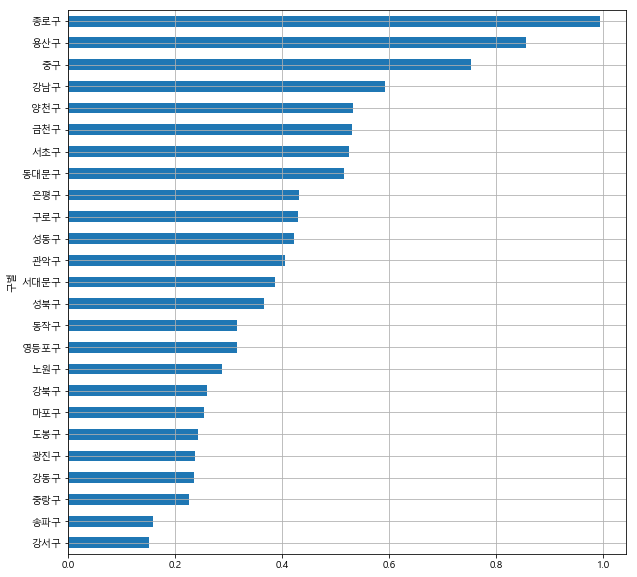

In [35]:
# 인구수 대비 CCTV비율
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

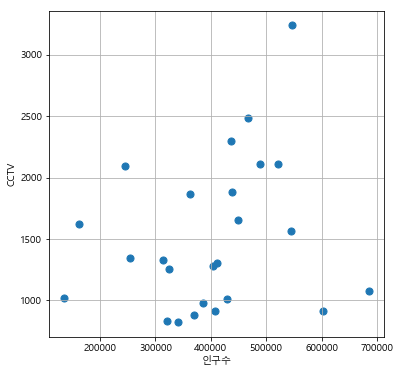

In [40]:
# 인구수와 CCTV개수가 상관관계가 있을까?
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [42]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
# polyfit : 데이터를 대표하는 직선 그리기
fp1

array([1.04688835e-03, 1.09426238e+03])

In [46]:
f1 = np.poly1d(fp1) # y축 데이터
fx = np.linspace(100000, 700000, 100) # x축 데이터

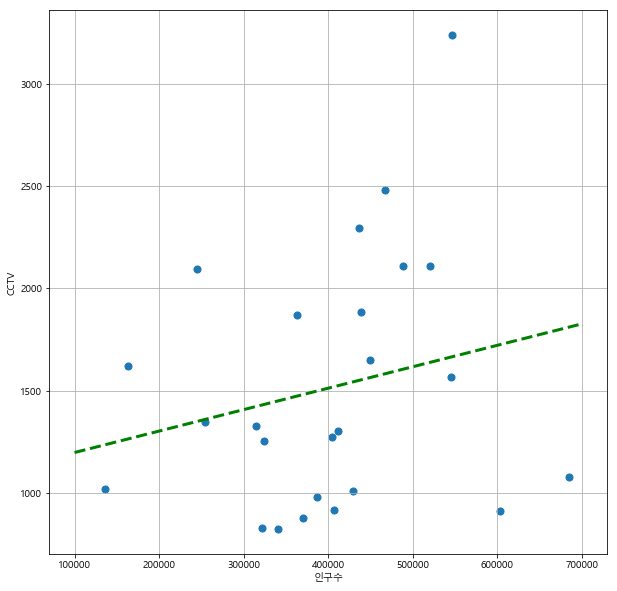

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [72]:
# 직선에서 멀어진 outlier찾기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
# 데이터를 대표하는 직선
# 1 : 찾고자 하는 함수의 차수

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
# np.abs : 절대값을 구하는 함수

df_sort = data_result.sort_values(by='오차', ascending=False)
# 오차가 큰 구 내림차순 정렬
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303,0.592091,1571.220548
양천구,2482,34.671731,466622,462599,4023,58930,0.862154,12.629066,0.531908,899.236479
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287,0.151107,814.416716
서초구,2297,63.371266,437007,432762,4245,55366,0.971380,12.669362,0.525621,745.240078
용산구,2096,53.216374,245139,229168,15971,38049,6.515079,15.521398,0.855025,745.104452


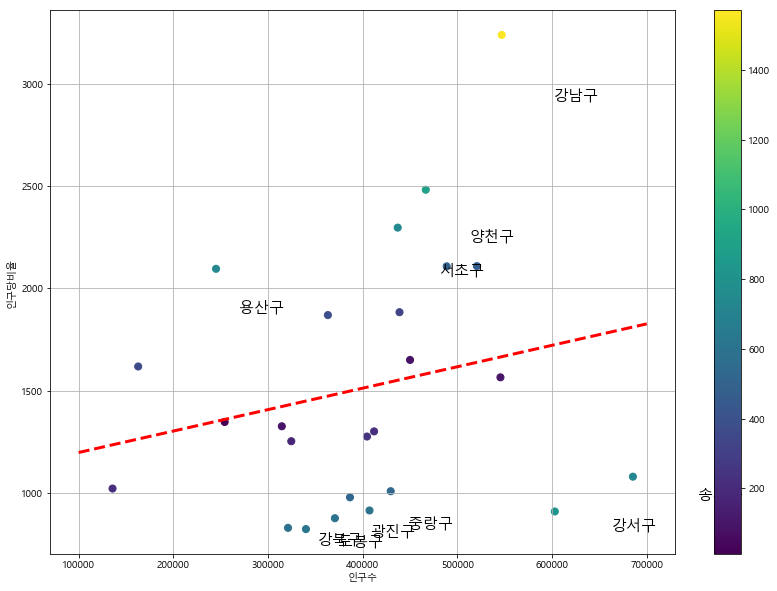

In [73]:
# 직선에서 멀어진 outlier는 다른 색으로 표현
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
# x축 : '인구수', y축 : '소계', c=data_result['오차'] : colorbar 설정
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')

# outlier 10개 구 이름 출력
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
# 1.02, 0.98 : 글자의 위치
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()